In [1]:
from keras import Model
from keras import layers,Input
import numpy as np
import matplotlib.pyplot as pp

Using TensorFlow backend.


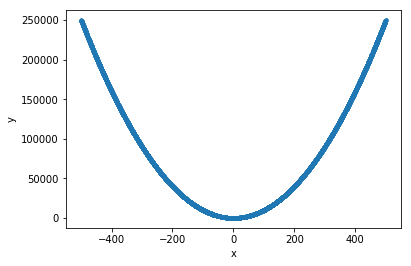

In [42]:
#Prepare input
x = np.random.random((10000,1))*1000-500
y=x**2
pp.xlabel('x')
pp.ylabel('y')
pp.plot(x,y,'.')

In [3]:
std = 1#x.std()
x_train= x/std

In [40]:
from keras.models import Sequential
from keras import regularizers
def getSequentialModel():
    model = Sequential()
    model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape = (1,)))
    model.add(layers.Dense(1))
    print(model.summary())
    return model
from keras import optimizers

def runmodel(model):
    #alpha = alpha_orig/(1+decay*epoch)
    model.compile(optimizer=optimizers.rmsprop(lr=0.01),loss='mse')
    from keras.callbacks import EarlyStopping
    early_stopping_monitor = EarlyStopping(patience=5)
    h = model.fit(x_train,y,validation_split=0.2,
             epochs= 300,
             batch_size=32,
             verbose=False,
             callbacks=[early_stopping_monitor])
    
    print('final loss = ', h.history['loss'][-1])
    pp.figure(figsize=(15,2.5))
    pp.plot(h.history['loss'][30:])
    


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None
final loss =  2562395.3235


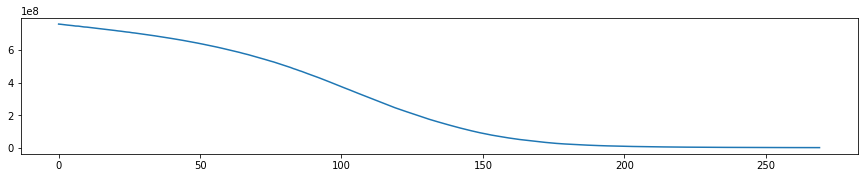

In [41]:
model = getSequentialModel()
runmodel(model)

# Predictions for general function
Deep learning in this example is not good at predicting a simple non linear function. But good at predicting values in the sample space of training data. 
The below example shows how the calculation can not predict y = x^2 function but the above graph shows

Text(0.5, 1.0, 'Prediction outside training sample space')

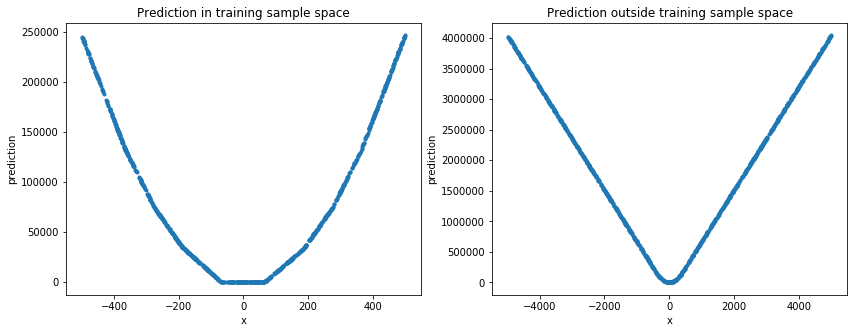

In [43]:
pp.figure(figsize=(14,5))
pp.subplot(1,2,1)
p = np.random.random((1000,1))*1000-500
pp.plot(p,model.predict(p), '.')
pp.xlabel('x')
pp.ylabel('prediction')
pp.title('Prediction in training sample space')

pp.subplot(1,2,2)
p = np.random.random((1000,1))*10000-5000
pp.plot(p,model.predict(p), '.')
pp.xlabel('x')
pp.ylabel('prediction')
pp.title('Prediction outside training sample space')